[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/royforestano/Deep_Learning_Symmetries/blob/main/sym_u_and_su_demo.ipynb)

# Discovering Sparse Representations of Lie Groups with Machine Learning - Demonstration

Author: Roy Forestano

Date of Completion: 18 February 2023

Connected to the paper on: Discovering Sparse Representations of Lie Groups with Machine Learning (arXiv:2302.05383: https://arxiv.org/abs/2302.05383)

This notebook will reproduce examples in the paper.

In [1]:
!pip install torch

In [2]:
from sym_u_and_su import *
%matplotlib inline

Using cpu device


In [3]:
# Define oracles and useful definitions
def oracle_norm(data): # L^2 Norm (includes imaginary) on X: sqrt(sum(|x_i|^2))
    return torch.norm(torch.abs(data),dim=1)

def oracle_complex_norm(data): # L^2 Norm (includes imaginary) on X: sqrt(sum(|x_i|^2))
    return linalg.vector_norm(data,dim=1)

def G2(data):
    return (c_tensor*torch.einsum('ij,ik,il->ijkl',data[:n//3],data[n//3:2*n//3],data[2*n//3:])).sum(dim=[1,2,3])

---

For the Lorentz Groups with and without Sparsity: Figures 1-2: $n_{dim} = 4, n_{gen}=6$ and $n_{dim} = 4, n_{gen}=4$, see LO46.ipynb and LO44.ipynb

---

# $U(2)$ and $SU(2)$: Figure 3: $n_{dim} = 2, n_{gen} = 4,3$

## $U(2)$: $n_{dim} = 2, n_{gen} = 4$

Epoch 600   |  Train Loss: 0.7728039006671907
Total Time: 22.68010116
Complete.


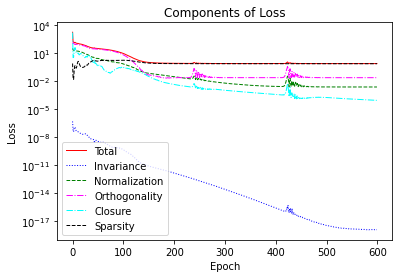

In [4]:
torch.manual_seed(0)
n       = 300   # sample size
n_dim   = 2     # dimension
n_gen   = 4     # N^2 for U(n) , N^2-1 for SU(n)
n_com   = int(n_gen*(n_gen-1)/2)  # N_g choose 2 of these
eps     = 1e-3
lr      = 7e-2
epochs  = 600
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

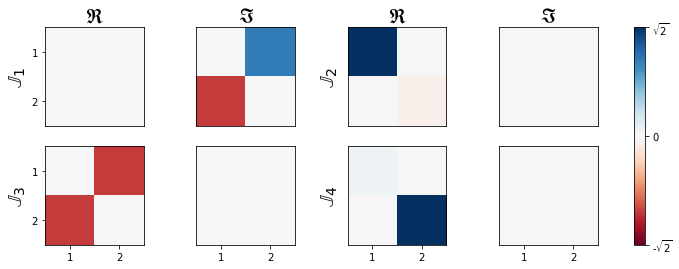

In [5]:
figsizeg = (13,4)
rows = 2
cols = 2*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

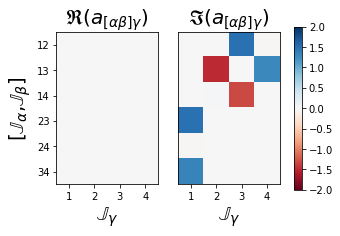

In [6]:
if n_gen>1 and include_sc:
    figsizec=(5,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [7]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.00059079-0.01200662j -0.00473017+0.00340322j  0.0019543 +1.4979761j
  0.00591633-0.02248424j]
 
 C = 
  [[ 0.00631087-0.00355533j -0.01015908+0.01150346j]
 [ 0.01356678+0.01037693j -0.00874318+0.02292971j]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.016052762046456337. 
 

13: 
 Structure Constants = [-1.01108009e-04+1.2379778e-04j -1.12000955e-02-1.4886254e+00j
 -2.94368856e-05-1.5418103e-04j  4.12971713e-03+1.2964922e+00j]
 
 C = 
  [[ 1.4136602e-02+3.9890051e-02j  1.8901682e-04+7.6448312e-05j]
 [-7.5444055e-05-1.1032121e-04j -5.6182118e-03+2.3239732e-02j]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.01664191298186779. 
 

14: 
 Structure Constants = [ 0.00102156-1.9262582e-03j -0.00085972+2.2391915e-02j
 -0.00195185-1.3259785e+00j -0.00065608-3.7412345e-04j]
 
 C = 
  [[ 0.0012021 -0.02262972j -0.00353497+0.01042747j]
 [ 0.0003556 +0.01240277j  0.00089592+0.001654

In [8]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.5718295574 rad, 90.0591997540 deg
Angle between generator 1 and 3: 2.0943877697 rad, 119.9995798676 deg
Angle between generator 1 and 4: 0.7853919268 rad, 44.9996426673 deg
Angle between generator 2 and 3: 0.7839239836 rad, 44.9155357179 deg
Angle between generator 2 and 4: 1.5740530491 rad, 90.1865964424 deg
Angle between generator 3 and 4: 2.3579773903 rad, 135.1021526508 deg


## $SU(2)$: $n_{dim} = 2, n_{gen} = 3$

Epoch 1000   |  Train Loss: 1.832932898907255
Total Time: 25.38237381
Complete.


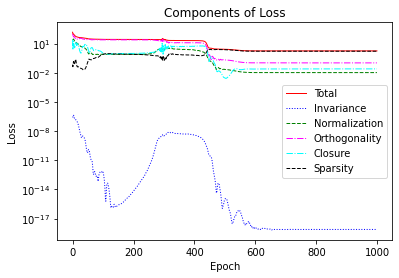

In [9]:
torch.manual_seed(0)
n       = 300
n_dim   = 2
n_gen   = 3
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 5e-2
epochs  = 1000
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

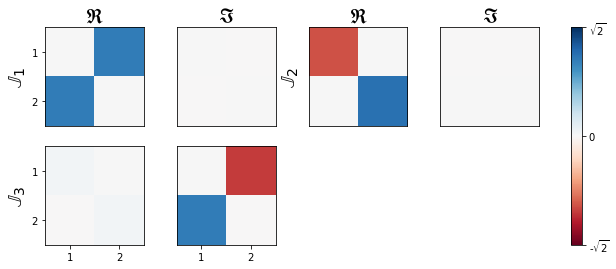

In [10]:
figsizeg = (13,4)
rows = 2
cols = 2*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

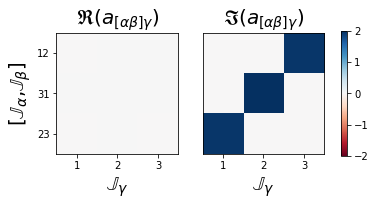

In [11]:
if n_gen>1 and include_sc:
    figsizec=(6,2.3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [12]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-2.6822090e-07-4.6938658e-07j  3.7252903e-09-1.3216212e-03j
  3.5613775e-06+1.9466454e+00j]
 
 C = 
  [[-1.1177562e-07-7.5936206e-02j  2.5799274e-03+5.5822903e-07j]
 [-2.5795698e-03-4.9943736e-07j -3.9310140e-07-6.4613089e-02j]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.036427199840545654. 
 

31: 
 Structure Constants = [ 5.9604645e-08-7.0780516e-07j  3.3527613e-06+2.0024981e+00j
 -1.4901161e-08-1.3217032e-03j]
 
 C = 
  [[-3.06897107e-07-1.6977632e-01j  5.76873729e-03+2.8845471e-07j]
 [-5.76841366e-03+3.8786681e-08j  1.10095414e-07-1.4445925e-01j]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0814431756734848. 
 

23: 
 Structure Constants = [-0.0035184 +1.9513487e+00j  0.00082669-3.7197371e-03j
 -0.00076119-1.0874604e-03j]
 
 C = 
  [[ 0.00076991-0.0032888j   0.0045548 -0.00520122j]
 [ 0.00239889-0.00369406j -0.00084407+0.00395071j]] 

The structure constants were fo

In [13]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.7853982449 rad, 45.0000046673 deg
Angle between generator 1 and 3: 1.0464373827 rad, 59.9564455533 deg
Angle between generator 2 and 3: 0.7842636108 rad, 44.9349949268 deg


---

# $U(3)$ and $SU(3)$: Figure 4: $n_{dim} = 3, n_{gen} = 9,8$

## $U(3)$: $n_{dim} = 3, n_{gen} = 9$

Epoch 2000   |  Train Loss: 2.3255440447615543
Total Time: 383.52498293
Complete.


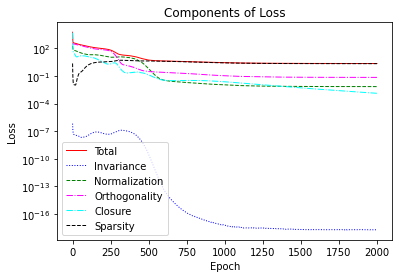

In [14]:
torch.manual_seed(0)
n       = 300
n_dim   = 3
n_gen   = 9
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-2
epochs  = 2000
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

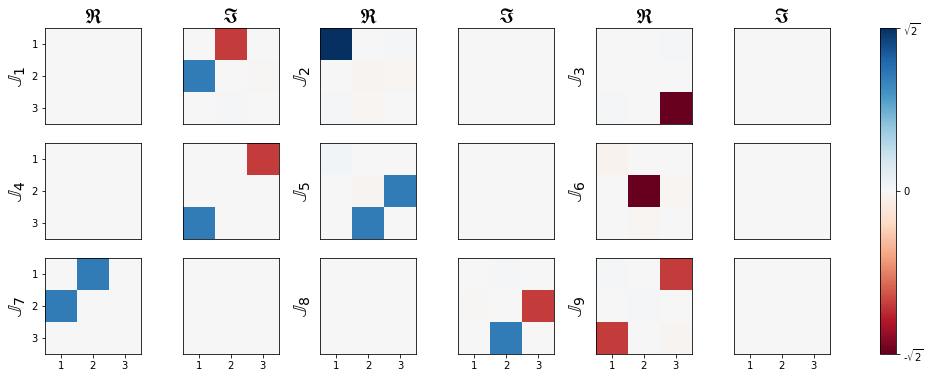

In [15]:
figsizeg = (18,6)
rows = 3
cols = 3*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred=gens_pred, rows=rows, cols=cols)

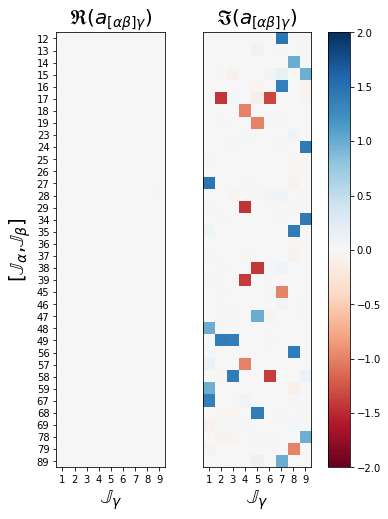

In [16]:
if n_gen>1 and include_sc:
    figsizec=(6,8)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [17]:
if n_gen>1 and include_sc and False:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [18]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.5727272034 rad, 90.1106310785 deg
Angle between generator 1 and 3: 1.5847264528 rad, 90.7981374298 deg
Angle between generator 1 and 4: 0.7854518890 rad, 45.0030782525 deg
Angle between generator 1 and 5: 1.5689302683 rad, 89.8930827232 deg
Angle between generator 1 and 6: 0.7858852744 rad, 45.0279094052 deg
Angle between generator 1 and 7: 1.5696554184 rad, 89.9346307639 deg
Angle between generator 1 and 8: 1.0471640825 rad, 59.9980823865 deg
Angle between generator 1 and 9: 1.5705519915 rad, 89.9860006167 deg
Angle between generator 2 and 3: 0.0192146450 rad, 1.1009180650 deg
Angle between generator 2 and 4: 1.5753500462 rad, 90.2609089006 deg
Angle between generator 2 and 5: 0.0177940503 rad, 1.0195239813 deg
Angle between generator 2 and 6: 1.5702220201 rad, 89.9670946531 deg
Angle between generator 2 and 7: 1.5532817841 rad, 88.9964906211 deg
Angle between generator 2 and 8: 1.5737552643 rad, 90.1695346299 deg
Angle between generator 2 and 9: 0.7

## $SU(3)$: $n_{dim} = 3, n_{gen} = 8$

Epoch 2000   |  Train Loss: 4.1575739711603975
Total Time: 313.39566278
Complete.


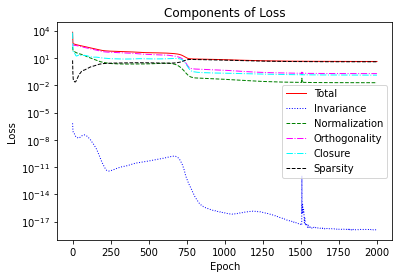

In [19]:
torch.manual_seed(0)
n       = 300
n_dim   = 3
n_gen   = 8
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-2
epochs  = 2000
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

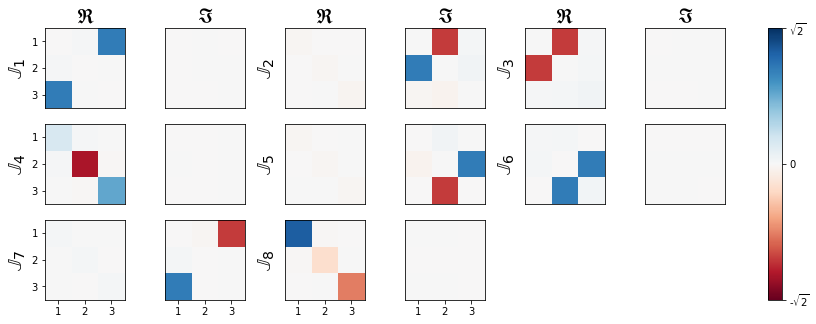

In [20]:
figsizeg = (18,5)
rows = 3
cols = 3*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

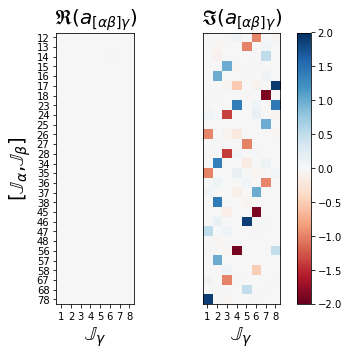

In [21]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [22]:
if n_gen>1 and include_sc and False:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [23]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.5561223030 rad, 89.1592403686 deg
Angle between generator 1 and 3: 1.5720854998 rad, 90.0738641702 deg
Angle between generator 1 and 4: 1.5968908072 rad, 91.4951035930 deg
Angle between generator 1 and 5: 0.7838534713 rad, 44.9114956610 deg
Angle between generator 1 and 6: 1.5697319508 rad, 89.9390157454 deg
Angle between generator 1 and 7: 1.5610693693 rad, 89.4426863890 deg
Angle between generator 1 and 8: 1.5967382193 rad, 91.4863609509 deg
Angle between generator 2 and 3: 0.0757505149 rad, 4.3401847977 deg
Angle between generator 2 and 4: 0.0644744635 rad, 3.6941146428 deg
Angle between generator 2 and 5: 1.5487579107 rad, 88.7372917722 deg
Angle between generator 2 and 6: 1.6464674473 rad, 94.3356358349 deg
Angle between generator 2 and 7: 0.7863613367 rad, 45.0551857656 deg
Angle between generator 2 and 8: 0.0626093298 rad, 3.5872503568 deg
Angle between generator 3 and 4: 0.0345991328 rad, 1.9823842863 deg
Angle between generator 3 and 5: 1.559

---

# $U(4)$ and $SU(4)$: Figure 5: $n_{dim} = 4, n_{gen} = 16,15$

## $U(4)$: $n_{dim} = 4, n_{gen} = 16$

Epoch 2000   |  Train Loss: 4.6374177738811644
Total Time: 486.66300106
Complete.


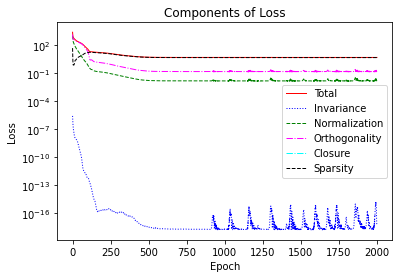

In [24]:
torch.manual_seed(0)
n       = 300
n_dim   = 4
n_gen   = 16
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 5e-3
epochs  = 2000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

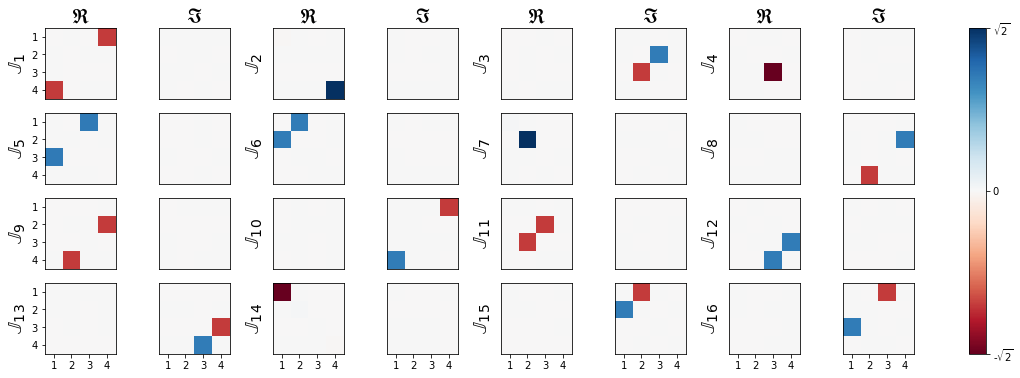

In [25]:
figsizeg = (20,6)
rows = 4
cols = 4*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [26]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [27]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [28]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

## $SU(4)$: $n_{dim} = 4, n_{gen} = 15$

Epoch 2000   |  Train Loss: 4.0593665154789354
Total Time: 388.35417700
Complete.


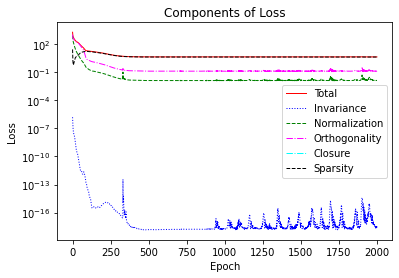

In [29]:
torch.manual_seed(0)
n       = 300
n_dim   = 4
n_gen   = 15
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 5e-3
epochs  = 2000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

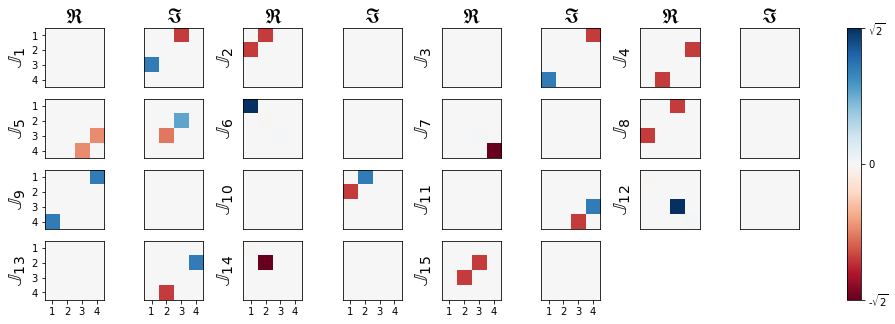

In [30]:
figsizeg = (20,5)
rows = 4
cols = 4*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [31]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [32]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [33]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

---

# $U(5)$ and $SU(5)$: Figure 6: $n_{dim} = 5, n_{gen} = 25,24$

## $U(5)$: $n_{dim} = 5, n_{gen} = 25$

Epoch 2000   |  Train Loss: 7.7240876730667525
Total Time: 1261.90251589
Complete.


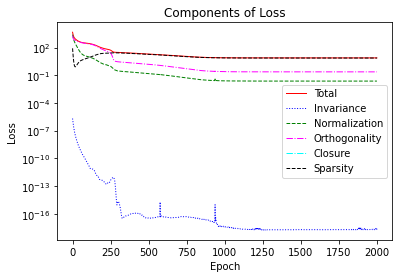

In [34]:
torch.manual_seed(0)
n       = 300
n_dim   = 5
n_gen   = 25
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 2000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

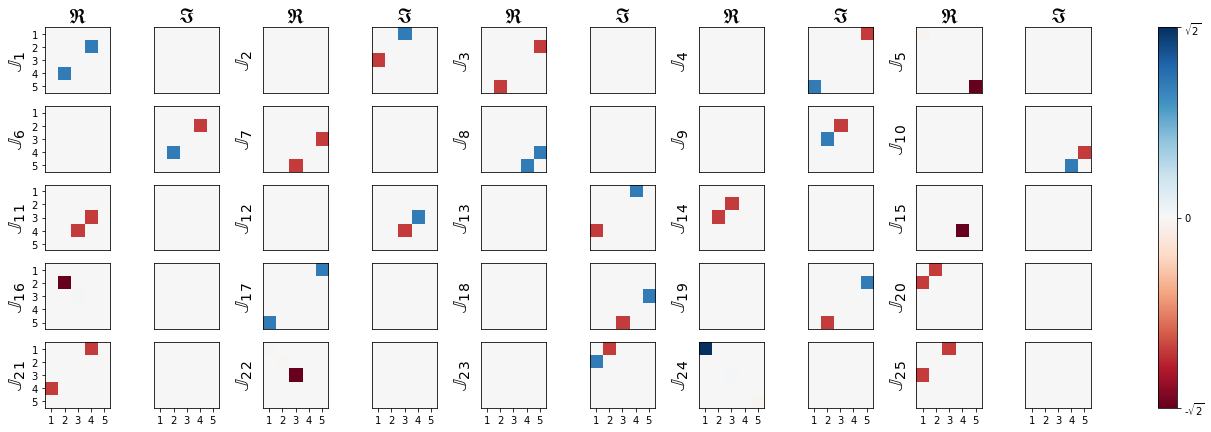

In [43]:
figsizeg = (24,7)
rows = 5
cols = 5*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [44]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [45]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [46]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

## $SU(5)$: $n_{dim} = 5, n_{gen} = 24$

Epoch 2000   |  Train Loss: 7.1480991156334215
Total Time: 24216.48614097
Complete.


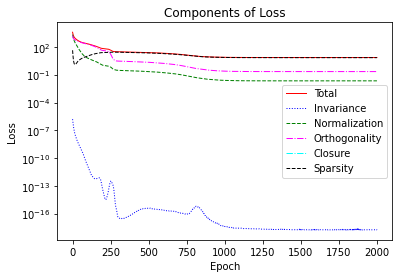

In [47]:
torch.manual_seed(0)
n       = 300
n_dim   = 5
n_gen   = 24
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 2000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

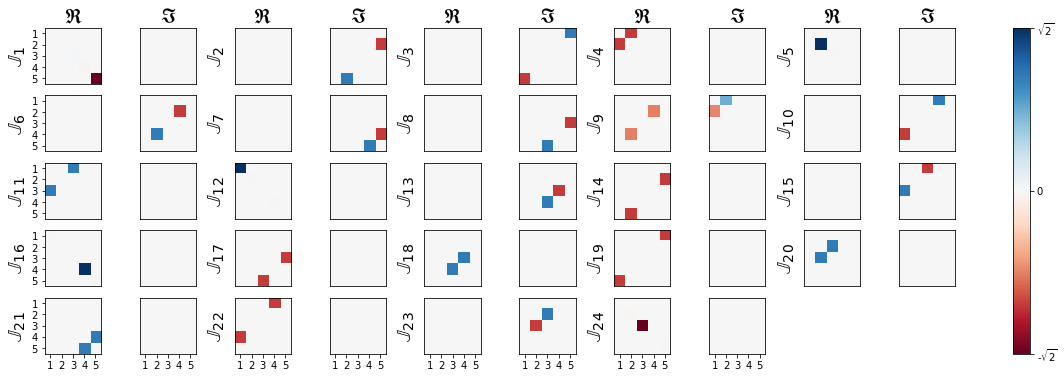

In [52]:
figsizeg =(24,6)
rows = 5
cols = 5*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [53]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [54]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [55]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

---

# $U(6)$ and $SU(6)$: Figure 6: $n_{dim} = 6, n_{gen} = 36,35$

## $U(6)$: $n_{dim} = 6, n_{gen} = 36$

Epoch 2000   |  Train Loss: 11.586699633913085
Total Time: 3461.49648285
Complete.


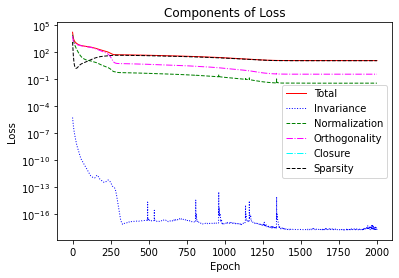

In [56]:
torch.manual_seed(0)
n       = 300
n_dim   = 6
n_gen   = 36
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 2000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

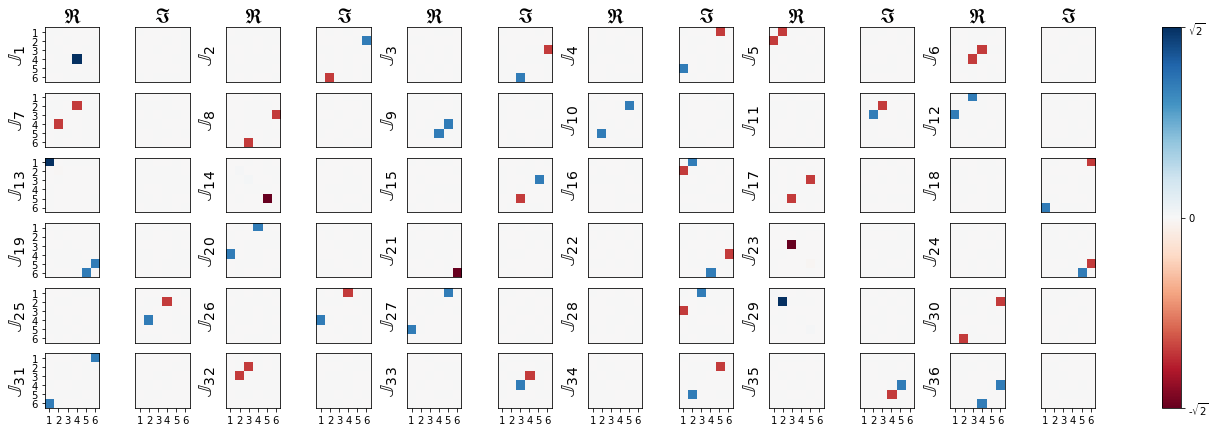

In [61]:
figsizeg = (24,7)
rows = 6
cols = 6*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [62]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [63]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [64]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

## $SU(6)$: $n_{dim} = 6, n_{gen} = 35$

Epoch 2000   |  Train Loss: 11.010903260240972
Total Time: 3120.62204385
Complete.


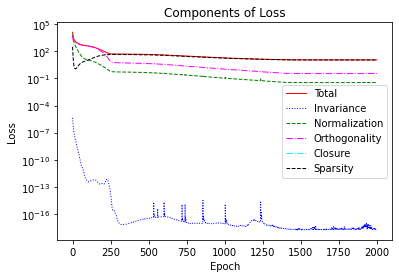

In [65]:
torch.manual_seed(0)
n       = 300
n_dim   = 6
n_gen   = 35
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 2000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

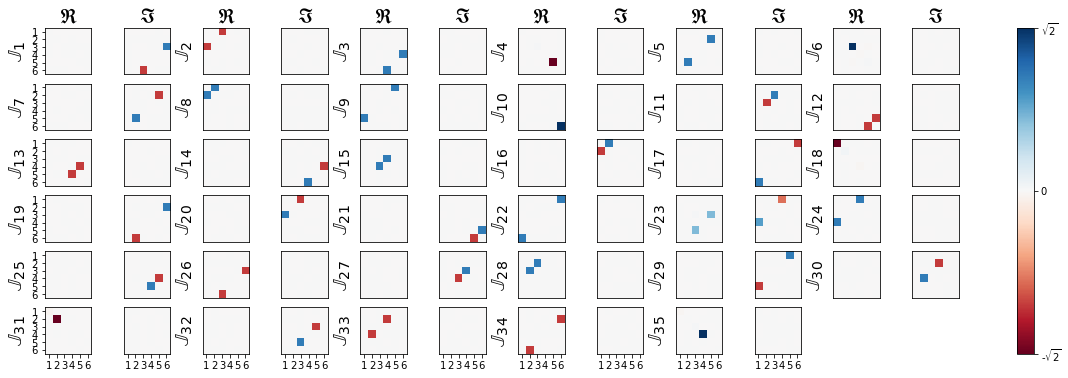

In [67]:
figsizeg = (24,6)
rows = 6
cols = 6*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [68]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [69]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [70]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)